In [1]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv(r'C:\Users\SNEHA\Desktop\Final Year Project\NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data["Close"] = pd.to_numeric(data["Close"], errors='coerce')
data = data.dropna()
data = data[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close']]
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Function to create sequences
def create_sequences(data, time_step=60):
    x, y = [], []
    for i in range(len(data)-time_step):
        x.append(data[i:(i+time_step), :-1])  # All features except 'Close'
        y.append(data[i + time_step, -1])     # 'Close' price
    return np.array(x), np.array(y)
time_step = 60
x, y = create_sequences(scaled_data, time_step)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [7]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(60, 5)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

C:\Users\SNEHA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,701 (1.08 MB)

 Trainable params: 283,701 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
23/23 - 10s - 436ms/step - loss: 0.0387
Epoch 2/30
23/23 - 2s - 108ms/step - loss: 0.0069
Epoch 3/30
23/23 - 2s - 105ms/step - loss: 0.0073
Epoch 4/30
23/23 - 2s - 106ms/step - loss: 0.0064
Epoch 5/30
23/23 - 2s - 103ms/step - loss: 0.0051
Epoch 6/30
23/23 - 3s - 116ms/step - loss: 0.0051
Epoch 7/30
23/23 - 5s - 224ms/step - loss: 0.0050
Epoch 8/30
23/23 - 2s - 102ms/step - loss: 0.0047
Epoch 9/30
23/23 - 2s - 95ms/step - loss: 0.0049
Epoch 10/30
23/23 - 2s - 95ms/step - loss: 0.0042
Epoch 11/30
23/23 - 2s - 104ms/step - loss: 0.0043
Epoch 12/30
23/23 - 2s - 106ms/step - loss: 0.0045
Epoch 13/30
23/23 - 2s - 97ms/step - loss: 0.0044
Epoch 14/30
23/23 - 2s - 99ms/step - loss: 0.0036
Epoch 15/30
23/23 - 2s - 92ms/step - loss: 0.0041
Epoch 16/30
23/23 - 2s - 91ms/step - loss: 0.0038
Epoch 17/30
23/23 - 2s - 98ms/step - loss: 0.0039
Epoch 18/30
23/23 - 3s - 109ms/step - loss: 0.0039
Epoch 19/30
23/23 - 2s - 101ms/step - loss: 0.0038
Epoch 20/30
23/23 - 2s - 99ms/step - loss: 0.0

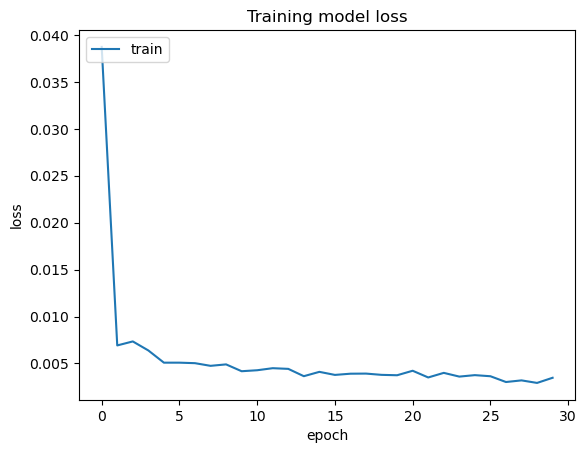

In [9]:
# It is the loss that incurred during the training process for each epoch
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [10]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], scaled_data.shape[1]-1)), y_pred), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], scaled_data.shape[1]-1)), y_test.reshape(-1, 1)), axis=1))[:, -1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step


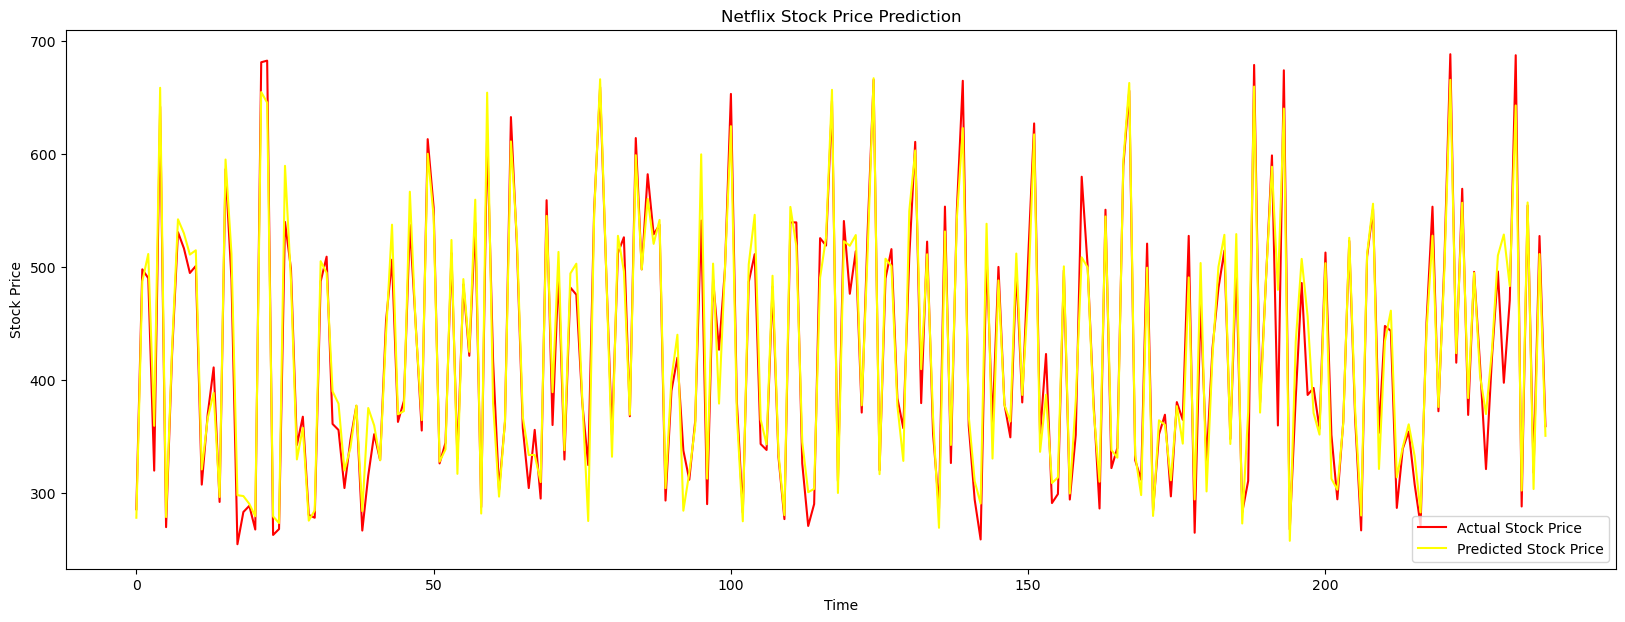

In [11]:
plt.figure(figsize=(20, 7))  # Adjust the width (20) and height (6) as needed
plt.plot(y_test, color="red", label='Actual Stock Price')
plt.plot(y_pred, color='yellow', label='Predicted Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

In [12]:

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 Score:", r2)
#print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.9547026188284705
Root Mean Squared Error (RMSE): 24.165228859049055
